# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [55]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [56]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 15
page_size = 100

reviews = []
dates = []  # List to store dates

for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    for element in parsed_content.select("article[itemprop='review']"):  # Select review articles
        # Extract review text
        text_content = element.find("div", {"class": "text_content"})
        if text_content:
            reviews.append(text_content.get_text().strip())

        # Extract review date
        date_element = element.find("time", {"itemprop": "datePublished"})
        if date_element:
            dates.append(date_element.get("datetime"))  # Get the datetime attribute
        else:
            dates.append(None)  # Append None if date not found

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews


In [57]:
df = pd.DataFrame()
df["reviews"] = reviews
df["date"] = dates  # Add the 'date' column
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' to datetime objects

df.head()

,reviews,date
0,✅ Trip Verified | We are extremely grateful ...,2025-05-08
1,✅ Trip Verified | I had an appalling experie...,2025-04-29
2,"Not Verified | Good points, the cabin crew, t...",2025-04-22
3,"Not Verified | It was a decent flight, reason...",2025-04-22
4,✅ Trip Verified | I really like flying Briti...,2025-04-18


In [58]:
df.to_csv(r"C:\Users\mojisola.omolere.UPPLC\Desktop\MOJISOLA\MY LAPTOP\Inspirational Books\Data/BA_Review.csv",index=False)

Congratulations! Now you have your dataset for this task! The loops above collected 1500 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [59]:
import numpy as np  # For numerical operations
import re  # For regular expressions
import nltk  # For text processing
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\mojisola.omolere.UPPLC\Desktop\MOJISOLA\MY LAPTOP\Inspirational Books\Data\BA_review.csv")  # Load the CSV
print(df.head())  # Display the first few rows
print(df.info())  # Show data types and non-null counts

                                             reviews        date
0  ✅ Trip Verified |   We are extremely grateful ...  2025-05-08
1  ✅ Trip Verified |   I had an appalling experie...  2025-04-29
2  Not Verified |  Good points, the cabin crew, t...  2025-04-22
3  Not Verified |  It was a decent flight, reason...  2025-04-22
4  ✅ Trip Verified |   I really like flying Briti...  2025-04-18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1500 non-null   object
 1   date     1500 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB
None


In [60]:
# Initial exploration
print("Data Overview:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Data Overview:
                                             reviews        date
0  ✅ Trip Verified |   We are extremely grateful ...  2025-05-08
1  ✅ Trip Verified |   I had an appalling experie...  2025-04-29
2  Not Verified |  Good points, the cabin crew, t...  2025-04-22
3  Not Verified |  It was a decent flight, reason...  2025-04-22
4  ✅ Trip Verified |   I really like flying Briti...  2025-04-18

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1500 non-null   object
 1   date     1500 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB
None

Missing Values:
reviews    0
date       0
dtype: int64


In [61]:
# Data Cleaning
    # Remove "Trip Verified" and "Not Verified"
df['reviews'] = df['reviews'].str.replace(r'✅ Trip Verified \| ', '', regex=True).str.replace(r'Not Verified \| ', '', regex=True)

    # Remove any leading/trailing whitespace
df['reviews'] = df['reviews'].str.strip()

    # Remove unnecessary characters (e.g., line breaks)
df['reviews'] = df['reviews'].str.replace(r'\n', ' ', regex=True)

    # Handle missing values (if any) - Impute or drop
df.dropna(subset=['reviews'], inplace=True)  # Drop rows with missing reviews

In [62]:
#Feature Engineering
    # Basic text statistics
df['word_count'] = df['reviews'].apply(lambda x: len(x.split()))

df['char_count'] = df['reviews'].apply(len)

print(df['char_count'].describe())

count    1500.000000
mean      845.698000
std       591.861384
min       129.000000
25%       426.000000
50%       686.000000
75%      1066.000000
max      3489.000000
Name: char_count, dtype: float64


In [63]:
df['reviews'] = df['reviews'].str.replace(r'✅ Trip Verified \| ', '', regex=True).str.replace(r'Not Verified \| ', '', regex=True)
df.head()

df['reviews'] = df['reviews'].str.strip()
print (df['reviews'])

0       ✅ Trip Verified |   We are extremely grateful ...
1       I had an appalling experience with British Air...
2       Good points, the cabin crew, they were helpful...
3       It was a decent flight, reasonable comfortable...
4       I really like flying British Airways particula...
                              ...                        
1495    London to Casablanca. Their customer service q...
1496    British Airways flight manager is very profess...
1497    Hyderabad to Brussels via London. Didn't expec...
1498    London Gatwick to Fort Lauderdale is one of BA...
1499    Milan to London Heathrow. The service and clea...
Name: reviews, Length: 1500, dtype: object


In [64]:
#Sentiment Analysis:**
from textblob import TextBlob

def get_sentiment(text):
        analysis = TextBlob(text)
        return analysis.sentiment.polarity #polarity from -1 to 1

df['sentiment'] = df['reviews'].apply(get_sentiment)

# Categorize sentiment
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0.1 else ('Negative' if x < -0.1 else 'Neutral'))
print (df['sentiment_label'])

0        Neutral
1        Neutral
2        Neutral
3       Positive
4       Positive
          ...   
1495     Neutral
1496     Neutral
1497     Neutral
1498     Neutral
1499     Neutral
Name: sentiment_label, Length: 1500, dtype: object


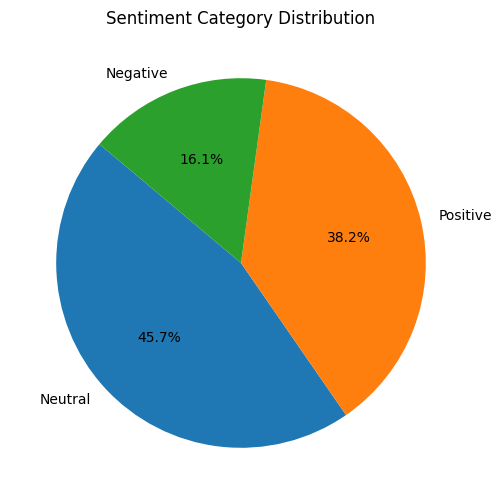

In [65]:
# Function to get sentiment category
def get_sentiment_category(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.1:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'reviews' column
df['sentiment_category'] = df['reviews'].apply(get_sentiment_category)

# Apply sentiment analysis to the 'reviews' column
df['sentiment'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)


# Get the value counts of each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Calculate percentages
sentiment_percentages = (sentiment_counts / sentiment_counts.sum()) * 100

# Create a pie chart of the sentiment category distribution
plt.figure(figsize=(8, 6))
plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Category Distribution')
plt.show()



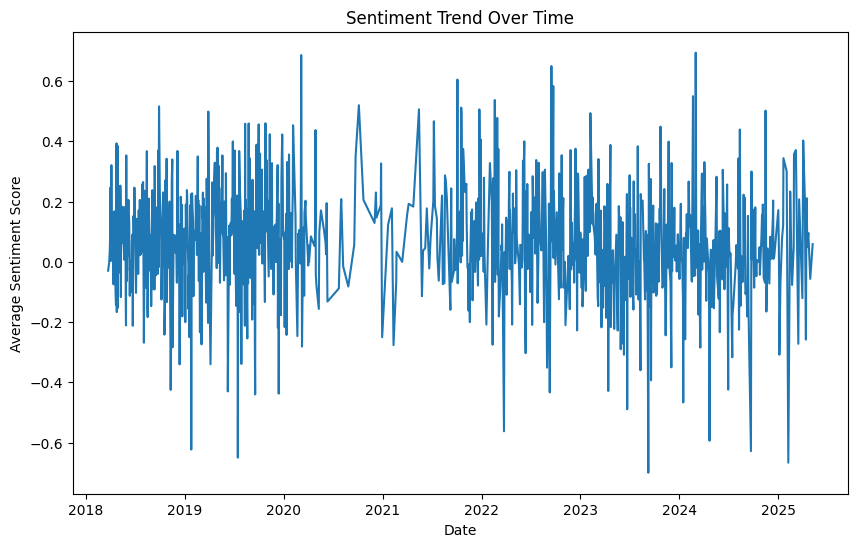

In [66]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])
#Resample the data by date and calculate the mean sentiment
sentiment_by_date = df.groupby('date')['sentiment'].mean()

# Plot the sentiment trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=sentiment_by_date.index, y=sentiment_by_date.values)
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.show()


In [67]:
# Topic Modeling (LDA)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['reviews'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(X)

# Display the top words for each topic
def display_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out())

Topic 0:
flight ba service crew good food seat class cabin london
Topic 1:
terrible bangalore flight delayed london service airways seat bag british
Topic 2:
euro berlin crew wet congestion delightful unremarkable amazing calgary cabin
Topic 3:
flight ba customer refund cancelled british airways told hours phone
Topic 4:
professionalism cityflyer marrakech thank sodium kindness delight asian delivering lousy


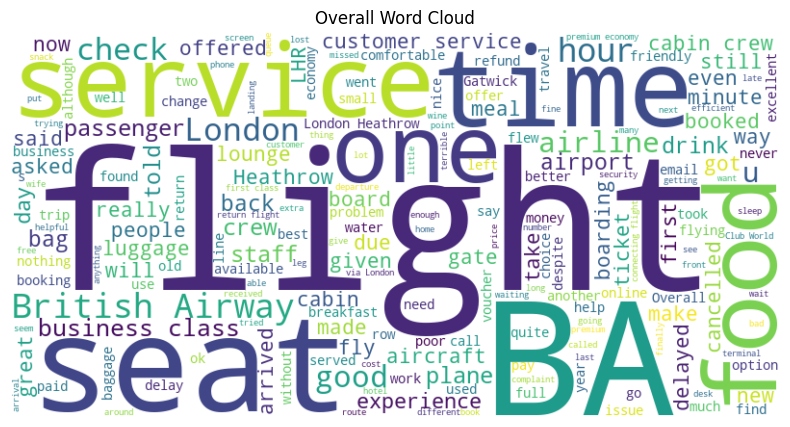

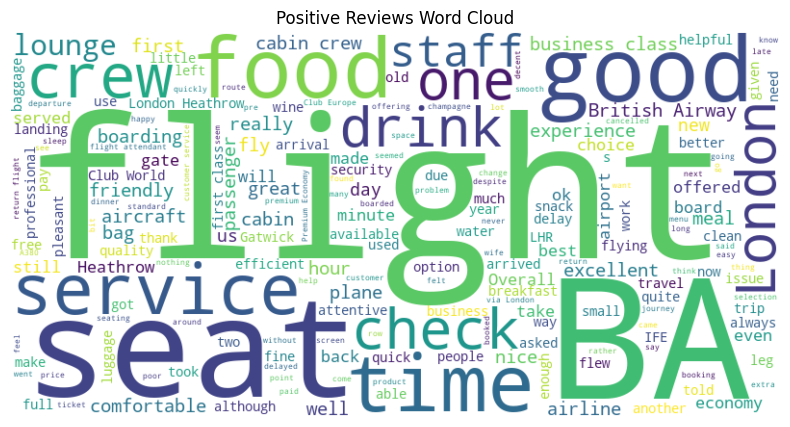

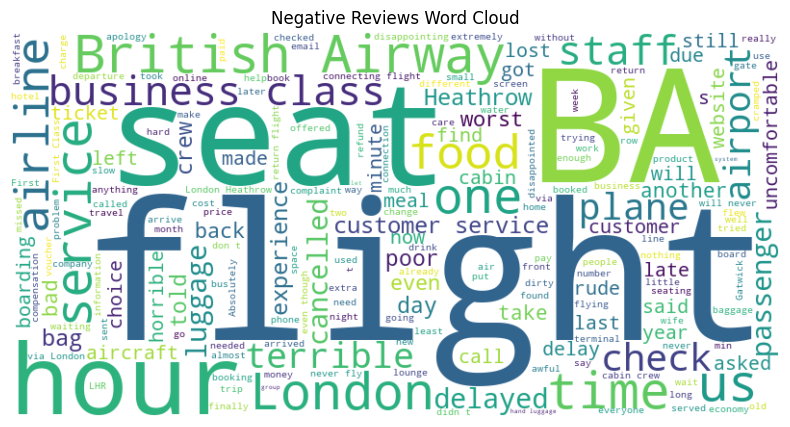

In [68]:
#Word Clouds:

from wordcloud import WordCloud

def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

create_wordcloud(df['reviews'], "Overall Word Cloud")

# Word clouds for sentiment categories
create_wordcloud(df[df['sentiment_label'] == 'Positive']['reviews'], "Positive Reviews Word Cloud")
create_wordcloud(df[df['sentiment_label'] == 'Negative']['reviews'], "Negative Reviews Word Cloud")

In [69]:
#Named Entity Recognition (NER):

import spacy

nlp = spacy.load('en_core_web_sm')  # Or 'en_core_web_lg'

def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df['entities'] = df['reviews'].apply(extract_entities)
print("\nNamed Entities:")
print(df[['reviews', 'entities']].head())

# Analyze frequent entities (e.g., locations, organizations)


Named Entities:
                                             reviews  \
0  ✅ Trip Verified |   We are extremely grateful ...   
1  I had an appalling experience with British Air...   
2  Good points, the cabin crew, they were helpful...   
3  It was a decent flight, reasonable comfortable...   
4  I really like flying British Airways particula...   

                                            entities  
0  [(Trip Verified, PERSON), (BA0058, PRODUCT), (...  
1  [(British Airways, ORG), (4 hours, TIME), (BA,...  
2  [(Quantity, NORP), (BA, ORG), (T3, ORG), (Gatw...  
3  [(BA, ORG), (BA, ORG), (Aegean, NORP), (Larnac...  
4  [(British Airways, ORG), (Club World, ORG), (B...  


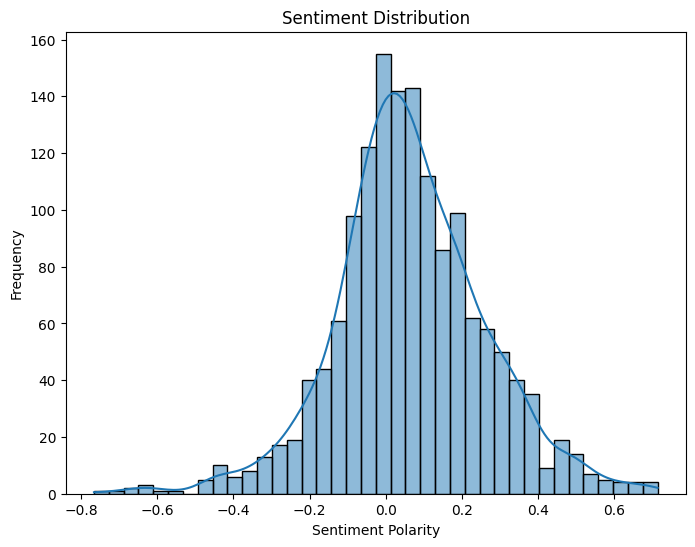

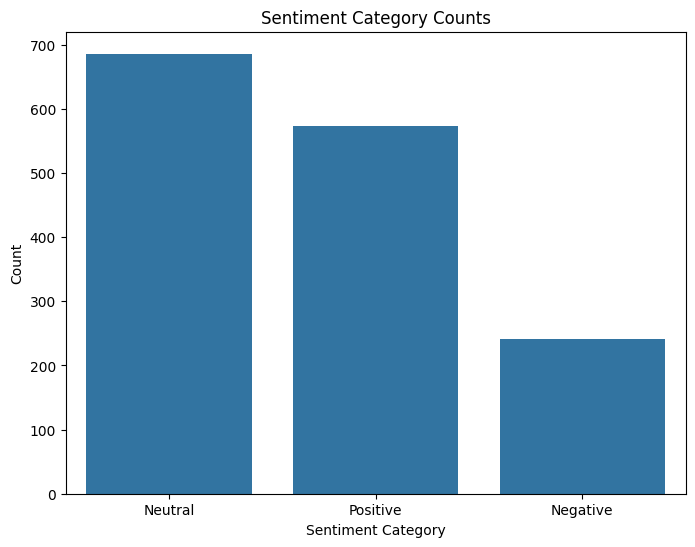

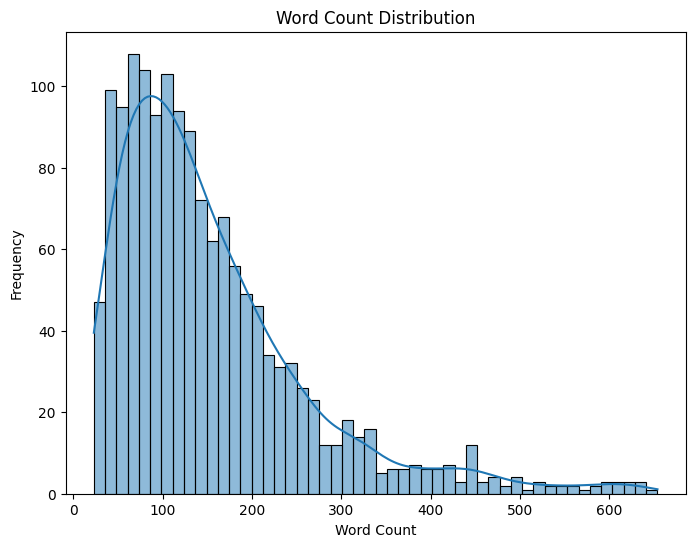

In [70]:
#Visualization:

# Sentiment distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment'], kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Sentiment counts
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=df)
plt.title('Sentiment Category Counts')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

# Word count distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()